# Automobile EDA
First import the necessary modules.

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno

from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

%matplotlib inline
# to display all figures the right size
sns.set(rc={"figure.figsize":(10, 6)})

Next import the dataset, <code>automobile.txt</code> and create the dataframe.

In [84]:
auto_df = pd.read_csv("automobile.txt")
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


From a Google search, 'symboling' is how risky this car is for an insurance company. It ranges from -3 (very safe) to +3 (very risky). 'normalized-losses' is the average loss of value per year, normalised for all vehicles of that body style. Next, examine the data:

In [85]:
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


From above, only 10 out of 26 columns are shown by describe. The describe method only returns information when it is in number form. Next, examine the data types in each column.

In [86]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

A lot of the columns are objects rather than ints or floats, including some columns that should be numbers. Examine the object columns to find out more information:

In [87]:
auto_df.describe(include=[object])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


Missing values are entered as '?' (a string character), so the whole column is changed to object data type. To change this into number, we need to replace the '?'.

In [88]:
auto_df.replace("?", np.nan, inplace=True)

## Missing Data
Now, we can examine how much data is missing.

In [89]:
total_cells = np.product(auto_df.shape)
missing_cells = auto_df.isna().sum().sum()
missing_percent = (missing_cells / total_cells) * 100
print(round(missing_percent,2), "%")

1.11 %


Only 1.11% of the data is missing. Where is the data missing?

In [90]:
auto_df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Visualised graphically below:

<AxesSubplot: >

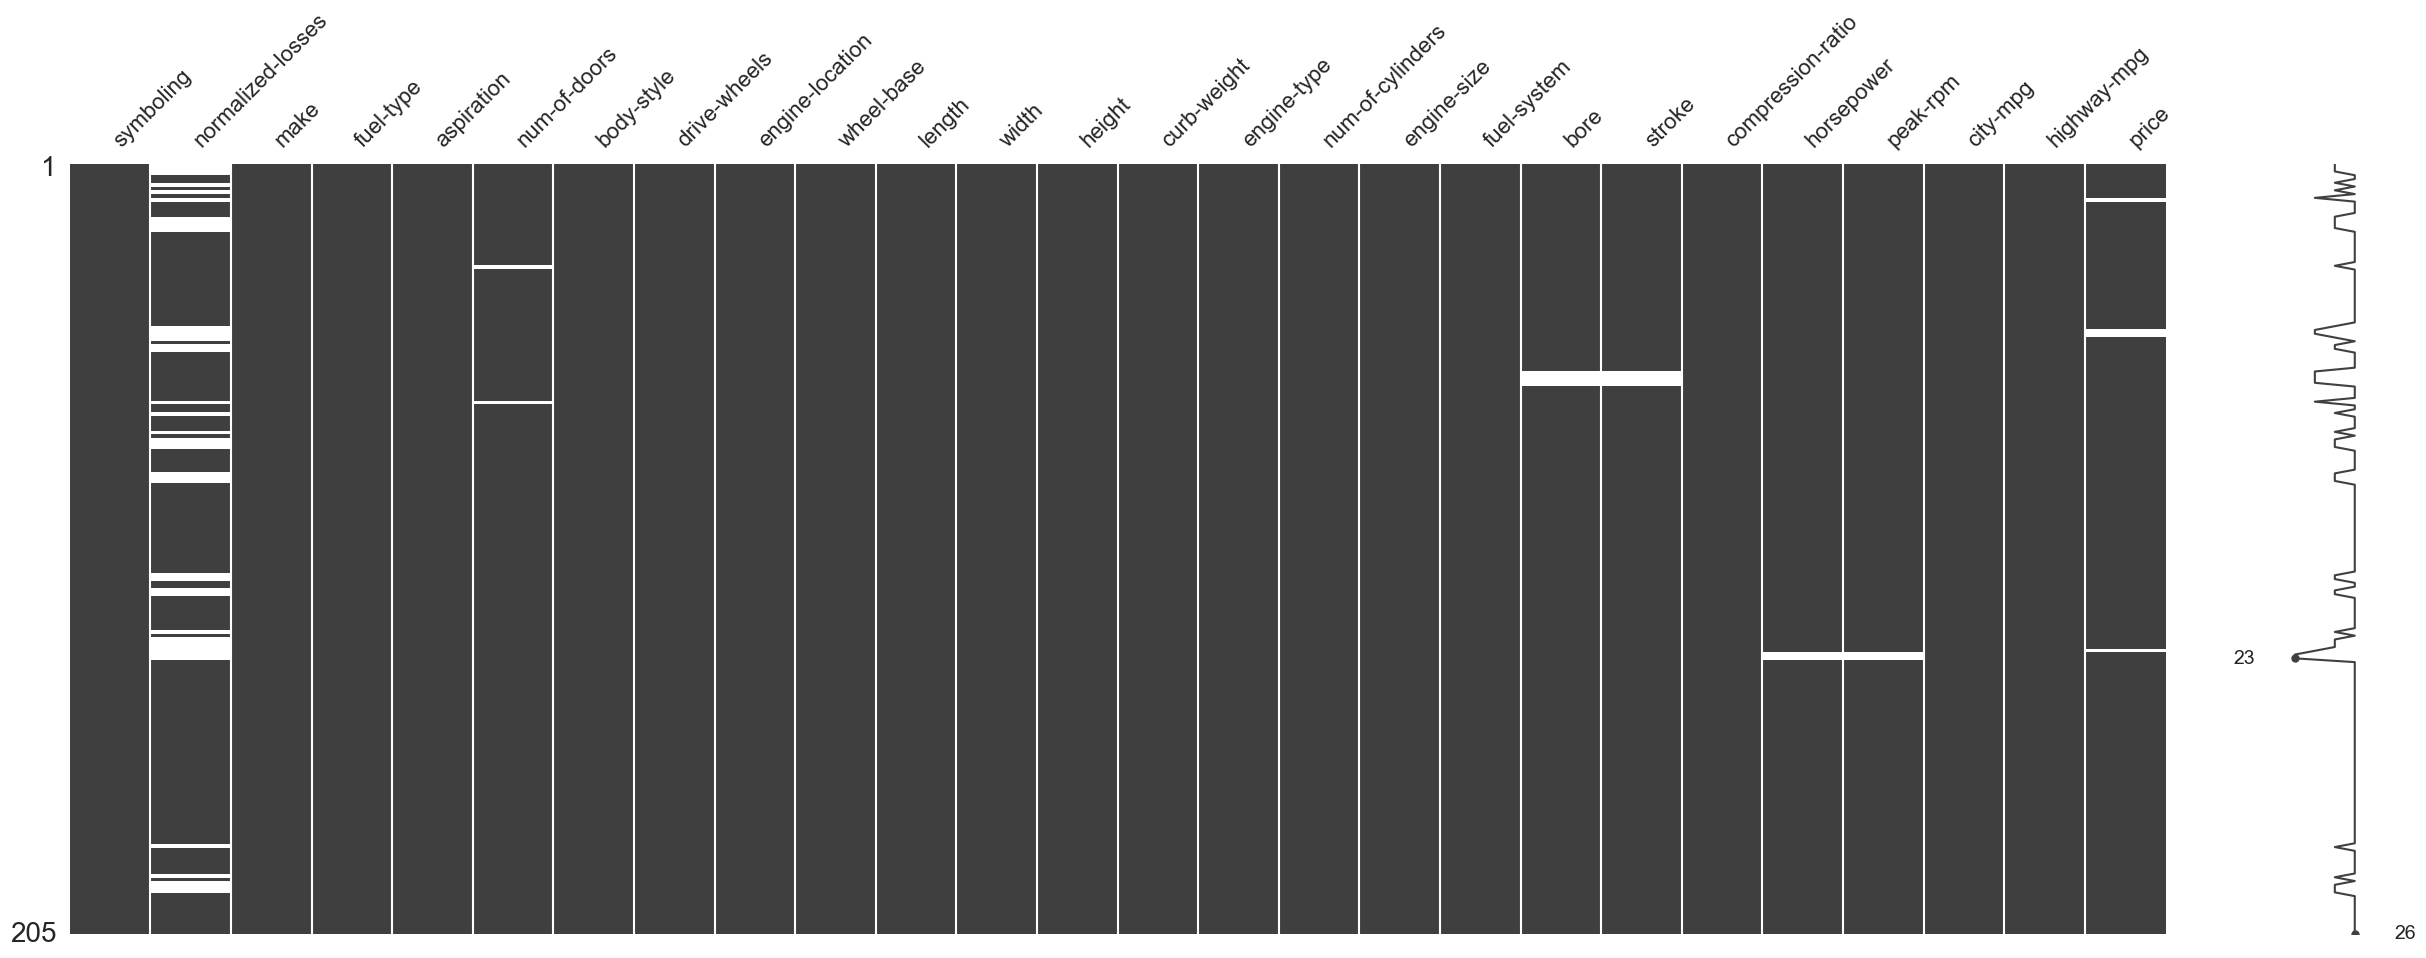

In [92]:
missingno.matrix(auto_df, figsize = (30,10))

Most of the missing data is from the 'normalized-losses' column. It may be possible to impute the missing data from other columns. First, the "num-of-doors" column.

### Number of doors

In [93]:
auto_df[auto_df["num-of-doors"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


Both missing values belong to Sedan style cars. What is the usual number of doors for a sedan?

In [94]:
auto_df[(auto_df["body-style"] == "sedan")]["num-of-doors"].value_counts()

four    79
two     15
Name: num-of-doors, dtype: int64

From the data, 79 out of 94 (84%) sedan cars are four door.

In [95]:
auto_df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In the whole dataset, 114 out of 203 (56%) of cars are four door. From this, it is probably safe to conclude that the two missing values are for four doors for the purpose of this analysis. (I think it makes sense to leave number of doors as a categorical value because we won't take the mean etc.)

In [96]:
auto_df["num-of-doors"] = auto_df["num-of-doors"].replace(np.nan, "four")

### Bore
The next column with missing values is 'bore', the diameter of each cylinder in the engine. Based on the data, bore is measured in inches.

In [97]:
auto_df[auto_df["bore"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


Convert "bore" to be a float.

In [98]:
auto_df["bore"] = auto_df["bore"].apply(np.float64)

Next, we can plot "bore" as a histogram to see if it is better to impute the median or the mean.

(array([ 1.,  1.,  8., 37., 40., 24., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

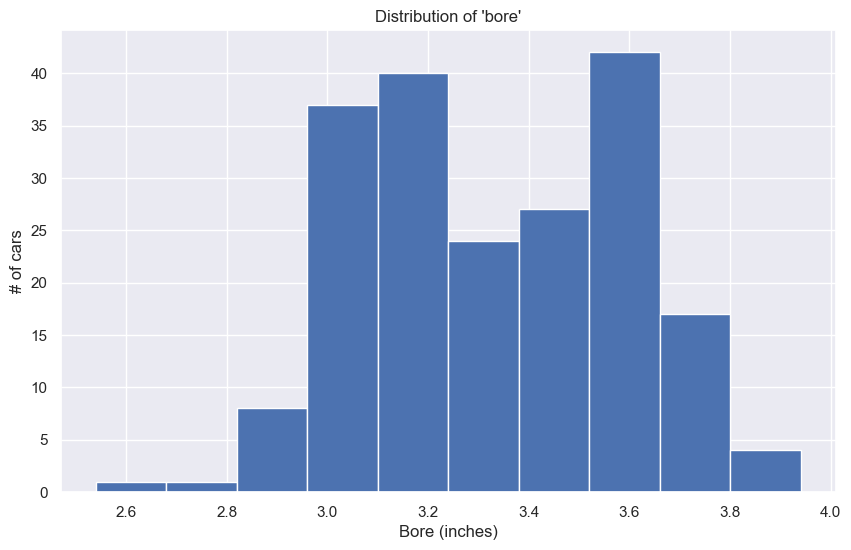

In [99]:
plt.title("Distribution of 'bore'")
plt.ylabel("# of cars")
plt.xlabel("Bore (inches)")
plt.hist(auto_df["bore"])

The histogram shows that the distribution is approximately normal and there are no extreme outliers. This means that the mean can be substituted for the missing values without comprimising the data.

In [100]:
auto_df["bore"].describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

Above, confirms that the mean is close to the median and the standard deviation is relatively small. Replace the missing bore values with the average bore.

In [101]:
bore_mean = auto_df["bore"].mean()
auto_df["bore"] = auto_df["bore"].replace(np.nan, bore_mean)

### Stroke
There is also missing values in the stroke column. Here, "stroke" is the stroke length (i.e the distance moved by a piston in the cylinder) measured in inches. First convert stroke to a float.

In [102]:
auto_df["stroke"] = auto_df["stroke"].apply(np.float64)

Examine the missing data. Here, cars with missing bore also have missing stroke.

In [103]:
auto_df[auto_df["stroke"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.329751,NaN,9.4,135,6000,16,23,15645


Repeat the same procedure as before. First examine the histogram:

(array([ 3.,  1., 13.,  7., 30., 52., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

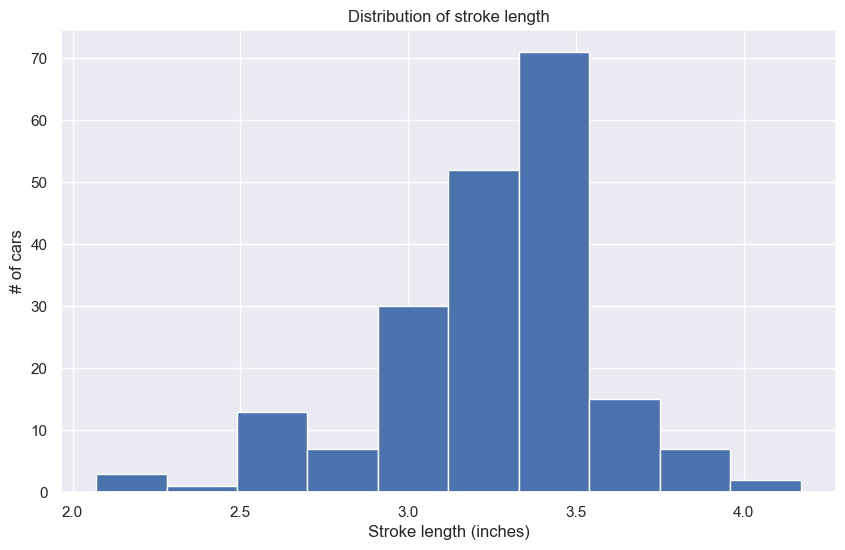

In [104]:
plt.title("Distribution of stroke length")
plt.ylabel("# of cars")
plt.xlabel("Stroke length (inches)")
plt.hist(auto_df["stroke"])

Again, the data seems quite normal without any significant outliers.

In [105]:
auto_df["stroke"].describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

Based on this, we can impute the mean for stroke length.

In [106]:
stroke_mean = auto_df["stroke"].mean()
auto_df["stroke"] = auto_df["stroke"].replace(np.nan, stroke_mean)

#### Displacement (Engine Size)
Diplacement is calculated using the stroke length, number of cylinders and the bore diameter using the formula:<br>
<code>displacement = stroke length * (pi/4) * bore^2 * number of cylinders</code><br>
It is also included in the data as "engine-size". We can use it to see how close the substituted values are:

In [107]:
auto_df.iloc[55]["stroke"]*(np.pi/4)*auto_df.iloc[55]["bore"]**2 * 2 

56.69579754095864

In [108]:
auto_df["engine-size"].iloc[55]

70

Based on the imputed data, the engine size should be 57 cubic inches, but in fact the engine is 70 cubic inches. This may be related to the number of cylinders. The only cars with two cylinder engines are missing the bore and stroke data.

In [109]:
auto_df[auto_df["num-of-cylinders"] == "two"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.329751,3.255423,9.4,135,6000,16,23,15645


Text(0.5, 1.0, 'Bore diameter by number of cylinders')

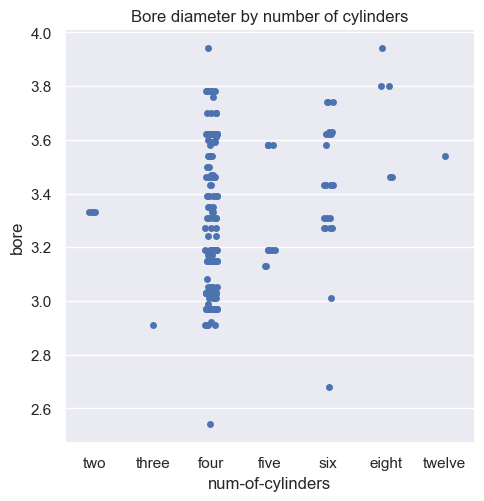

In [110]:
sns.catplot(data=auto_df,
            x="num-of-cylinders",
            y="bore",
           order=["two", "three", "four", "five", "six", "eight", "twelve"])
plt.title("Bore diameter by number of cylinders")

Text(0.5, 1.0, 'Stroke length by number of cylinders')

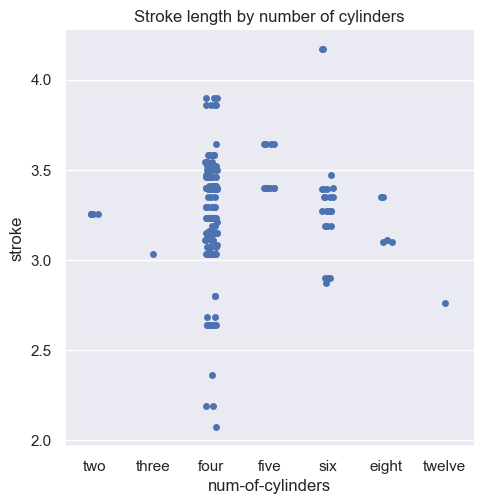

In [111]:
sns.catplot(data=auto_df,
            x="num-of-cylinders",
            y="stroke",
           order=["two", "three", "four", "five", "six", "eight", "twelve"])
plt.title("Stroke length by number of cylinders")

Text(0.5, 1.0, 'Engine size by number of cylinders')

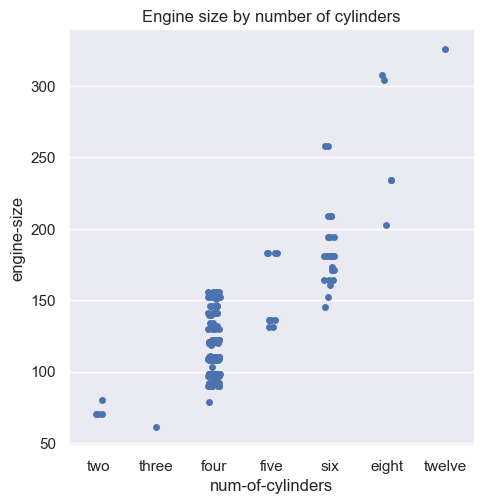

In [112]:
sns.catplot(data=auto_df,
            x="num-of-cylinders",
            y="engine-size",
           order=["two", "three", "four", "five", "six", "eight", "twelve"])
plt.title("Engine size by number of cylinders")

Based on the above graphs, the imputed data is not accurate. In order to better estimate the missing data, more information about two cylinder engines is required. It is given that these cars have rotary engines. In that case bore and stroke were left blank because the data does not exist (missing not at random). However, all data for engine size is available, making bore and stroke data less useful for the analysis. The bore and stroke columns can be dropped completely.

In [113]:
auto_df.drop(columns=["bore", "stroke"], index=1, inplace=True)

### Horsepower

Horsepower also has a couple of missing values:

In [114]:
auto_df[auto_df["horsepower"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,ohc,four,132,mpfi,8.7,NaN,NaN,23,31,9295
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,ohc,four,132,mpfi,8.7,NaN,NaN,23,31,9895


Check the distribution of horsepower:

(array([55., 49., 48., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

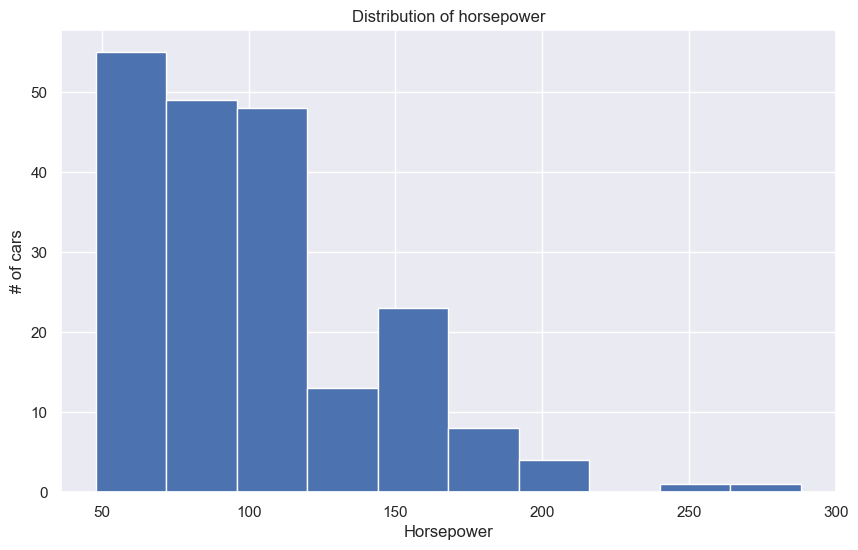

In [115]:
# can't convert into int64 because missing values, but can convert to float
auto_df["horsepower"] = auto_df["horsepower"].apply(np.float64)
plt.title("Distribution of horsepower")
plt.ylabel("# of cars")
plt.xlabel("Horsepower")
plt.hist(auto_df["horsepower"])

The distribution of horsepower is skewed. It might be better to predict it based on other values.

[Text(0.5, 1.0, 'Horsepower vs. engine size'),
 Text(0.5, 0, 'Engine size (cubic inches)'),
 Text(0, 0.5, 'Horsepower')]

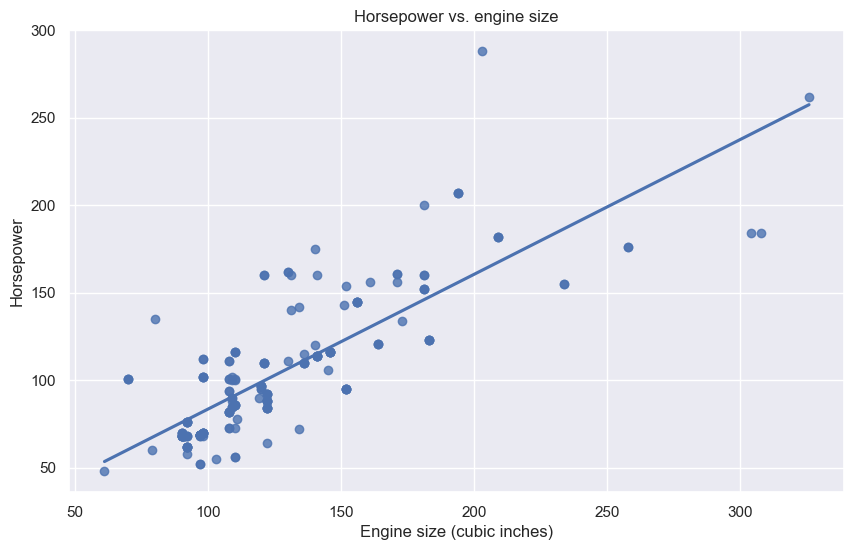

In [116]:
sns.regplot(data=auto_df,
           x="engine-size",
           y="horsepower",
           ci=None).set(title="Horsepower vs. engine size",
                       xlabel="Engine size (cubic inches)",
                       ylabel="Horsepower")

In [117]:
auto_df["engine-size"].corr(auto_df["horsepower"])

0.8107786389509067

There is quite a strong correlation between engine size and horsepower. We can use engine size to predict horsepower.

In [118]:
# rename engine size to an ols friendly name
auto_df.rename(columns={"engine-size": "engine_size"}, inplace=True)

Create the model:

In [119]:
mdl_horsepower_engine_size = ols("horsepower ~ engine_size", data=auto_df).fit()

Get the gradient and intercept from the model:

In [120]:
horsepower_predictor = mdl_horsepower_engine_size.params
horsepower_multiplier = horsepower_predictor[1]
horsepower_intercept = horsepower_predictor[0]

Replace the missing values with the estimates:

In [121]:
auto_df.at[130, "horsepower"] = int(auto_df.loc[130]["engine_size"] * horsepower_multiplier + horsepower_intercept)
auto_df.at[131, "horsepower"] = int(auto_df.loc[131]["engine_size"] * horsepower_multiplier + horsepower_intercept)

Now that there are no missing values in the horsepower column, it can be converted to int:

In [122]:
auto_df["horsepower"] = auto_df["horsepower"].apply(np.int64)

### Peak-RPM
The cars missing horsepower are also missing Peak-RPM:

In [123]:
auto_df[auto_df["peak-rpm"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-type,num-of-cylinders,engine_size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,ohc,four,132,mpfi,8.7,108,NaN,23,31,9295
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,ohc,four,132,mpfi,8.7,108,NaN,23,31,9895


Examining the distribution of peak-rpm:

(array([17., 10., 41., 30., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

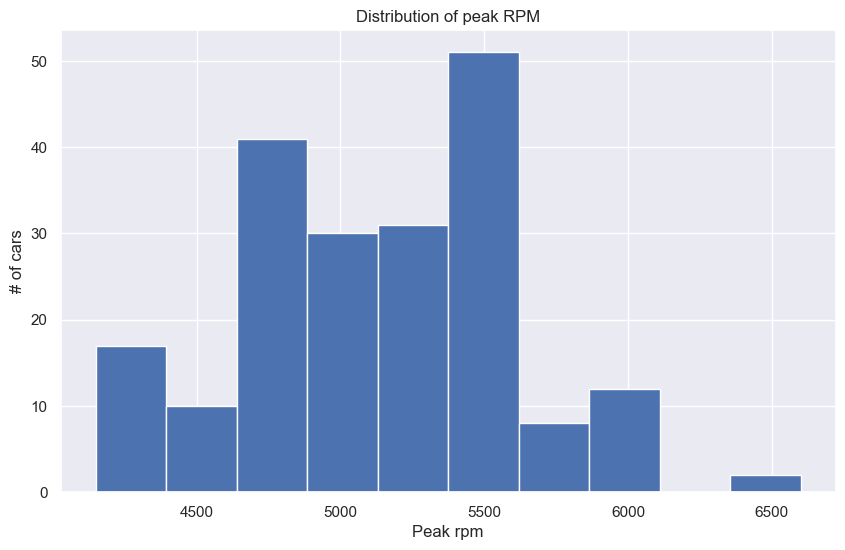

In [124]:
auto_df["peak-rpm"] = auto_df["peak-rpm"].apply(np.float64)
plt.title("Distribution of peak RPM")
plt.ylabel("# of cars")
plt.xlabel("Peak rpm")
plt.hist(auto_df["peak-rpm"])

In [125]:
auto_df["peak-rpm"].describe()

count     202.000000
mean     5125.990099
std       480.443680
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

Fairly normal, and the mean and median are quite similar, so we can replace the missing values with the median.

In [126]:
rpm_mean = auto_df["peak-rpm"].mean()
auto_df["peak-rpm"] = auto_df["peak-rpm"].replace(np.nan, rpm_mean)

Convert into int64:

In [127]:
auto_df["peak-rpm"] = auto_df["peak-rpm"].apply(np.int64)

### Price
Four cars are also missing values for price

In [128]:
auto_df[auto_df["price"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-type,num-of-cylinders,engine_size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,ohc,five,131,mpfi,7.0,160,5500,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,ohc,four,90,2bbl,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,ohc,four,90,2bbl,9.6,70,5400,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,dohcv,eight,203,mpfi,10.0,288,5750,17,28,NaN


(array([81., 45., 34., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

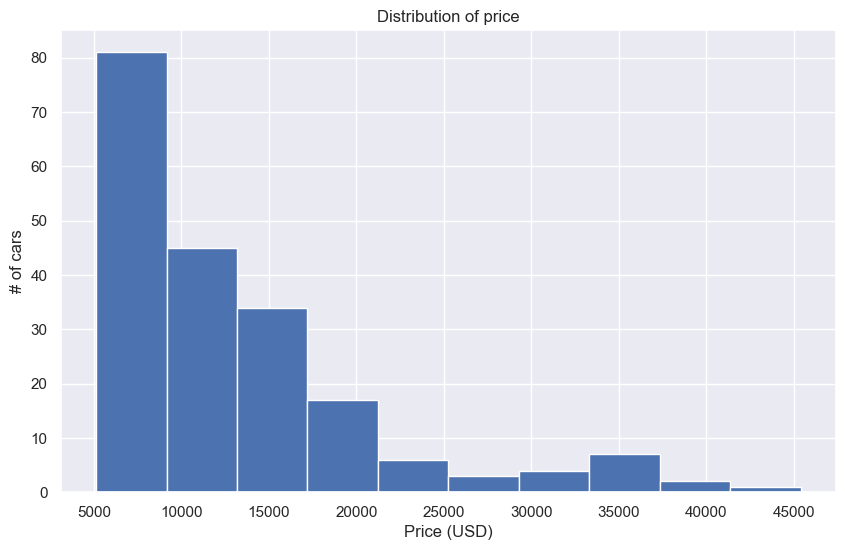

In [129]:
auto_df["price"] = auto_df["price"].apply(np.float64)
plt.title("Distribution of price")
plt.ylabel("# of cars")
plt.xlabel("Price (USD)")
plt.hist(auto_df["price"])

From the histogram above, price is heavily skewed. It is probably better to drop the rows without price than try to impute data.

In [130]:
auto_df.dropna(subset=["price"], axis=0, inplace=True)

### Normalized-Losses
This column is missing a lot of data, and I am not entirely sure what it represents. It is better to completely drop this column.

In [131]:
auto_df.drop(columns=["normalized-losses"], axis=1, inplace=True)

Now there are no more missing numbers in the dataset

## Organising data
For better analysis, we can classify the price as the categorical value "price range", with the values "low", "lower medium", "upper medium" and "high" based on the quartiles.

In [132]:
auto_df["price"].describe()

count      200.000000
mean     13190.665000
std       7963.571418
min       5118.000000
25%       7775.000000
50%      10270.000000
75%      16500.750000
max      45400.000000
Name: price, dtype: float64

In [133]:
auto_df["price_range"] = pd.cut(auto_df["price"],
                              bins=[0, 7775, 10270, 16500, 45400],
                             labels=["low", "lower medium", "upper medium", "high"])

## Data Exploration
Now the data has been prepared, it is ready for exploration. First, we can see what makes are represented in the data.

[Text(0.5, 1.0, 'Number of cars by make'), Text(0, 0.5, '# of cars')]

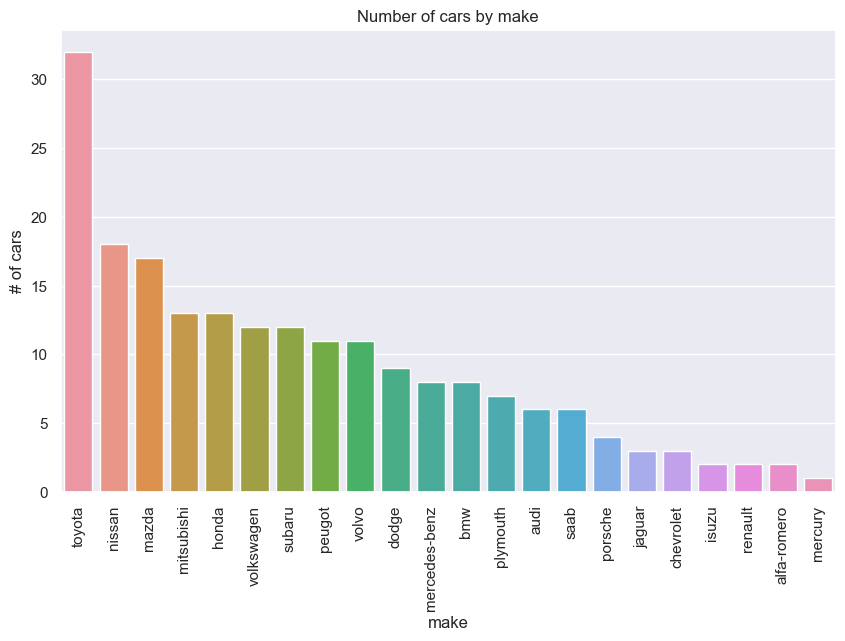

In [134]:
plt.xticks(rotation=90)
sns.countplot(x="make",
             data=auto_df,
             order=auto_df["make"].value_counts().index).set(title="Number of cars by make",
                                                            ylabel="# of cars")

22 makes are represented in the dataset. By far the most common make is Toyota, followed by Nissan and Mazda. The least common make is Mercury.

[Text(0.5, 1.0, 'Number of high priced cars by make'),
 Text(0, 0.5, '# of cars')]

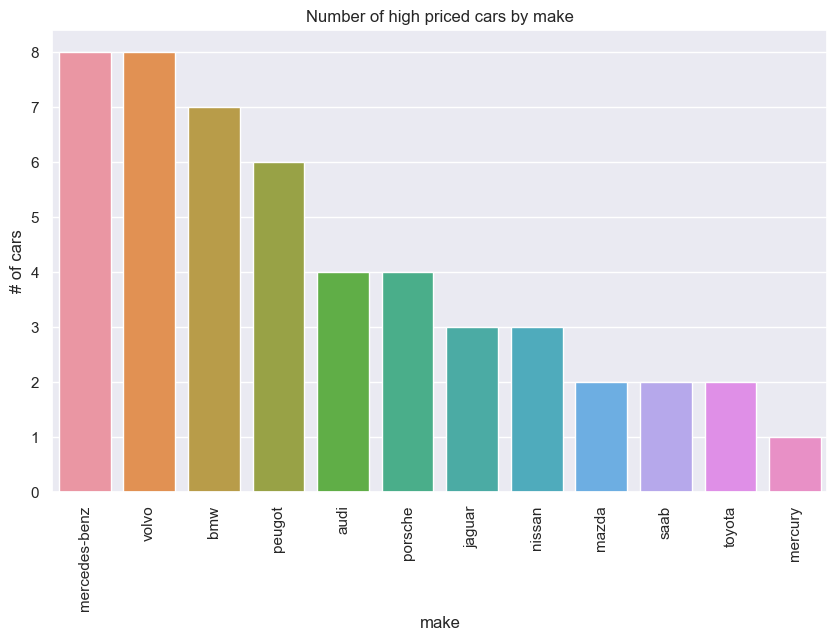

In [135]:
expensive_cars = auto_df[auto_df["price_range"] == "high"]
plt.xticks(rotation=90)
sns.countplot(x="make",
             data=expensive_cars,
            order=expensive_cars["make"].value_counts().index).set(title="Number of high priced cars by make",
                                                            ylabel="# of cars")

Out of the 22 manufacturers, only 12 are represented among the most expensive cars. Mercedes-Benz producing the highest number of expensive cars. Furthermore, Mercedes-Benz, Porsche, Jaguar and Mercury all produce only expensive cars.

[Text(0.5, 1.0, 'Number of low priced cars by make'),
 Text(0, 0.5, '# of cars')]

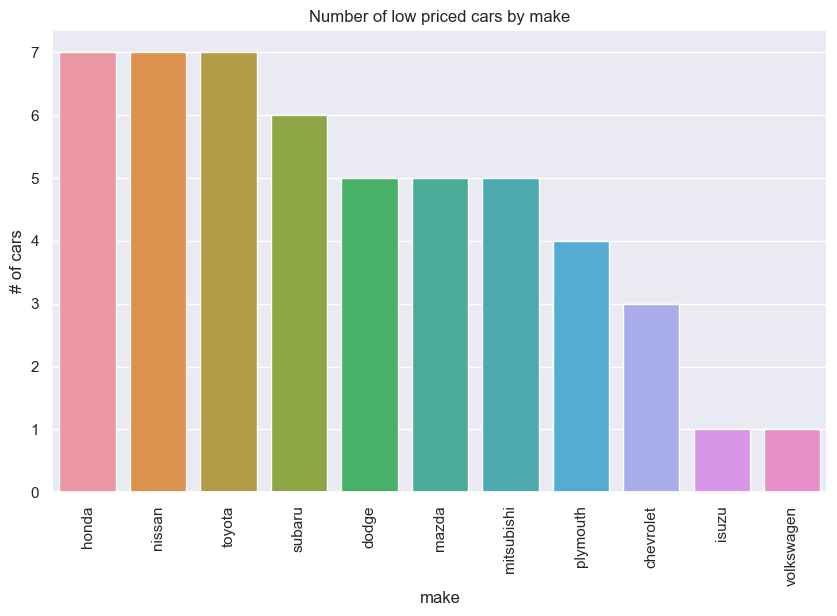

In [136]:
cheap_cars = auto_df[auto_df["price_range"] == "low"]
plt.xticks(rotation=90)
sns.countplot(x="make",
             data=cheap_cars,
            order=cheap_cars["make"].value_counts().index).set(title="Number of low priced cars by make",
                                                            ylabel="# of cars")


Among the lowest priced cars there are 11 manufacturers. Nissan, Toyota and Mazda are represented on both extremes. Chevrolet exclusively produces low priced cars.

In [137]:
grouped_manufacturers = auto_df.groupby("make", as_index=False)["price"].agg(["mean", "std"])
grouped_manufacturers.rename(columns={'mean':'mean price'}, inplace=True)
grouped_manufacturers.sort_values(by="mean price", ascending=False).head()

,mean price,std
make,,
jaguar,34600.000000,2047.559523
mercedes-benz,33647.000000,6789.560306
porsche,31400.500000,6528.784343
bmw,26118.750000,9263.832033
volvo,18063.181818,3314.650263


On average the manufacturers producing the most expensive cars are:
<ol>
    <li>Jaguar</li>
    <li>Mercedes-Benz</li>
    <li>Porsche</li>
    <li>BMW</li>
    <li>Volvo</li>
</ol>

In [138]:
grouped_manufacturers.sort_values(by="mean price", ascending=True).head()

,mean price,std
make,,
chevrolet,6007.000000,754.421633
dodge,7875.444444,2213.386044
plymouth,7963.428571,2395.544257
honda,8184.692308,2061.672112
subaru,8541.250000,1940.191468


The manufacturers with the cheapest cars are:
<ol>
    <li>Chevrolet</li>
    <li>Dodge</li>
    <li>Plymouth</li>
    <li>Honda</li>
    <li>Subaru</li>
</ol>
But what are the main differences between high priced cars and low priced cars?

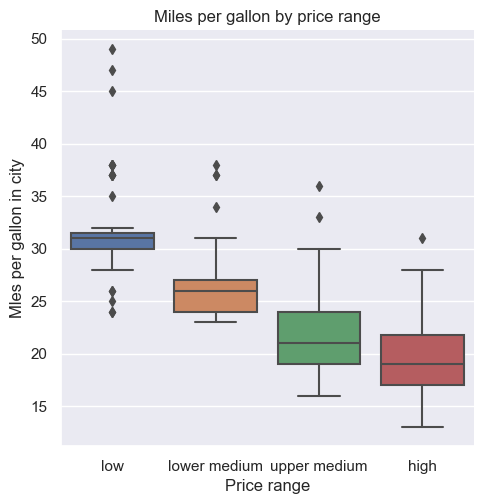

In [139]:
sns.catplot(data=auto_df,
           x="price_range",
           y="city-mpg",
           kind="box").set(title="Miles per gallon by price range",
                           ylabel="Mles per gallon in city",
                          xlabel="Price range")
plt.savefig('plot4.png', dpi=300, bbox_inches='tight')

The above charts shows that the most petrol efficient cars are the lowest priced. This does not seem inuitive, so there is probably a lurking variable present.

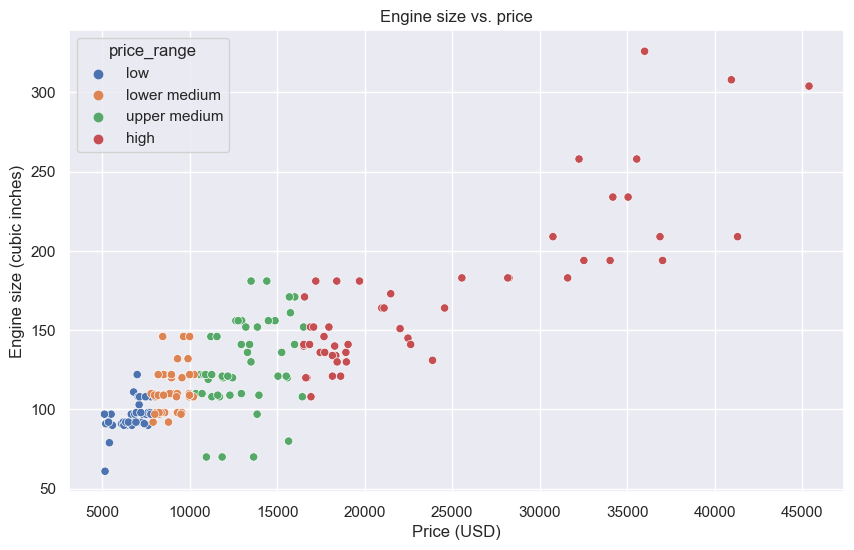

In [140]:
sns.scatterplot(data=auto_df,
               x="price",
               y="engine_size",
               hue="price_range").set(title="Engine size vs. price",
                                     ylabel="Engine size (cubic inches)",
                                     xlabel="Price (USD)")

In [142]:
auto_df["price"].corr(auto_df["engine_size"])

0.8725674562804436

Engine size is correlated with price. The more expensive a car is, the bigger the engine. This makes more sense. The points are coloured to better see the price distribution.

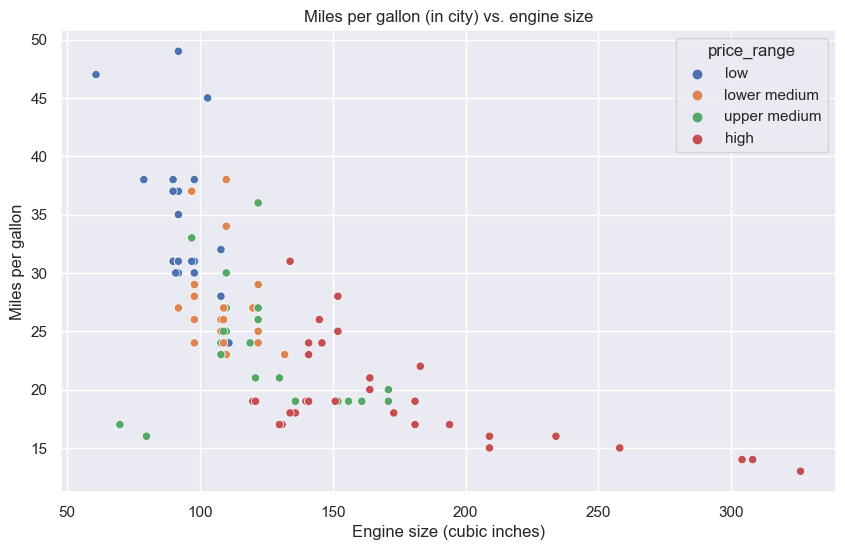

In [143]:
sns.scatterplot(data=auto_df,
               x="engine_size",
               y="city-mpg",
               hue="price_range").set(title="Miles per gallon (in city) vs. engine size",
                                     ylabel="Miles per gallon",
                                     xlabel="Engine size (cubic inches)")


Here we can see that MPG is correlated with engine size. From the colours, we can see that low priced cars are mainly represented in the top left (small engine, high mpg) and higher priced cars in the bottom right (big engine, low mpg).

#### Body-style vs. Price
We can also examine how the body style of a car might influence its price.

In [145]:
table_style_cost = pd.pivot_table(auto_df, values="make", index="body-style", columns="price_range",
                          aggfunc="count")
table_style_cost

price_range,low,lower medium,upper medium,high
body-style,,,,
convertible,0,0,2,3
hardtop,0,3,1,4
hatchback,26,17,18,7
sedan,21,21,22,30
wagon,4,8,7,6


From the pivot table, we can see that the price of a car is influenced by its body-style. Convertibles tend to be the most expensive. Hatchbacks and sedans are the most common style. Sedans are the most common high priced car while hatchbacks are the most common low priced car. Illustrated as a heat map below:

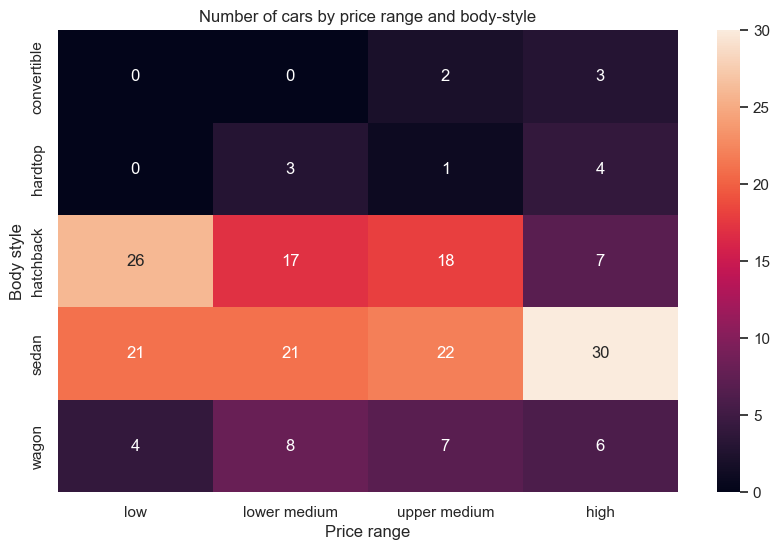

In [146]:
sns.heatmap(table_style_cost, annot=True).set(title="Number of cars by price range and body-style",
                                             xlabel="Price range",
                                             ylabel="Body style")

Look at the average price per body style:

In [148]:
style_price = pd.pivot_table(auto_df, values="price", index="body-style",
                          aggfunc="mean", fill_value=0)
style_price

,price
body-style,
convertible,22968.600000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


As shown below, hardtops and convertibles are the most expensive car on average. However, the average was based on a small number of cars, so it is not very accurate (shown by the error bars). Hatchbacks are the lowest priced cars.

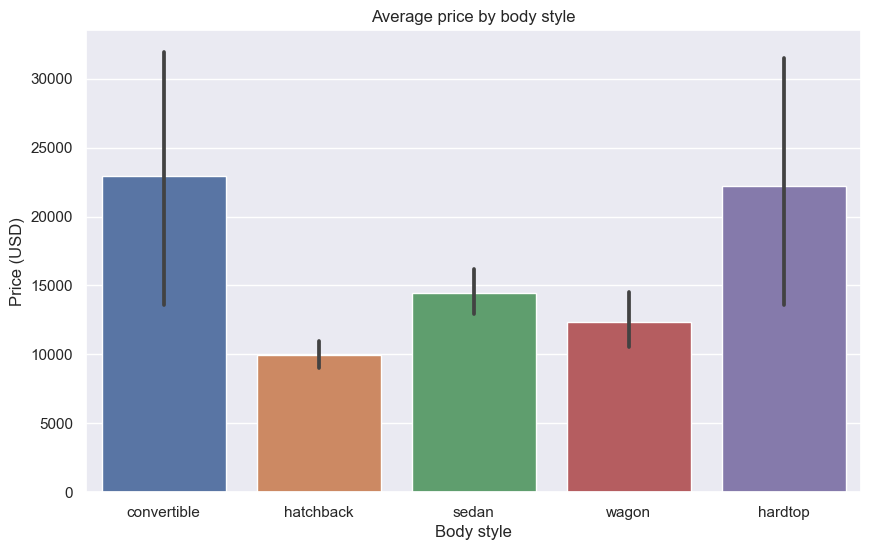

In [149]:
sns.barplot(data=auto_df,
           x="body-style",
           y="price").set(title="Average price by body style",
                         xlabel="Body style",
                         ylabel="Price (USD)")

This analysis has mainly considered how the price of a vehicle influences its characteristics. Higher priced cars tend to be sedans, hardtops or convertibles with large engines and high horsepower and poor fuel efficiency, while lower priced cars are hatchbacks with smaller engines.

#### Drive wheels
Next consider how drive wheels influence the fuel efficiency.

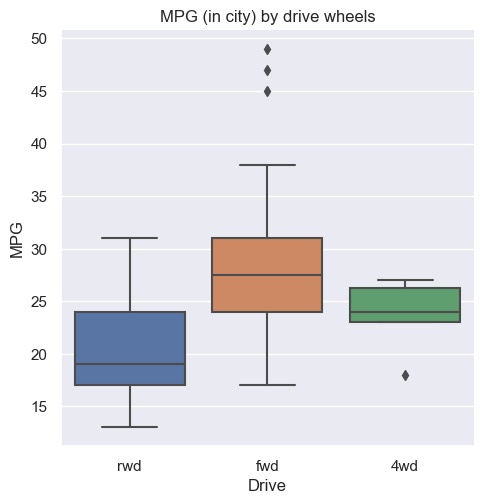

In [150]:
sns.catplot(data=auto_df, x="drive-wheels", y="city-mpg", kind="box").set(title="MPG (in city) by drive wheels",
                                                                         xlabel="Drive",
                                                                         ylabel="MPG")

Forward wheel drive cars are the most fuel efficient, rear wheel drive cars are the least fuel efficient. Which body style is the most fuel efficient?

In [152]:
mpg_style_table = pd.pivot_table(auto_df, values="city-mpg", index="body-style", columns="drive-wheels",
                          aggfunc="mean")
mpg_style_table

drive-wheels,4wd,fwd,rwd
body-style,,,
convertible,NaN,24.000000,19.500000
hardtop,NaN,31.000000,20.285714
hatchback,26.0,28.959184,20.222222
sedan,22.0,28.000000,20.805556
wagon,25.0,25.666667,21.444444


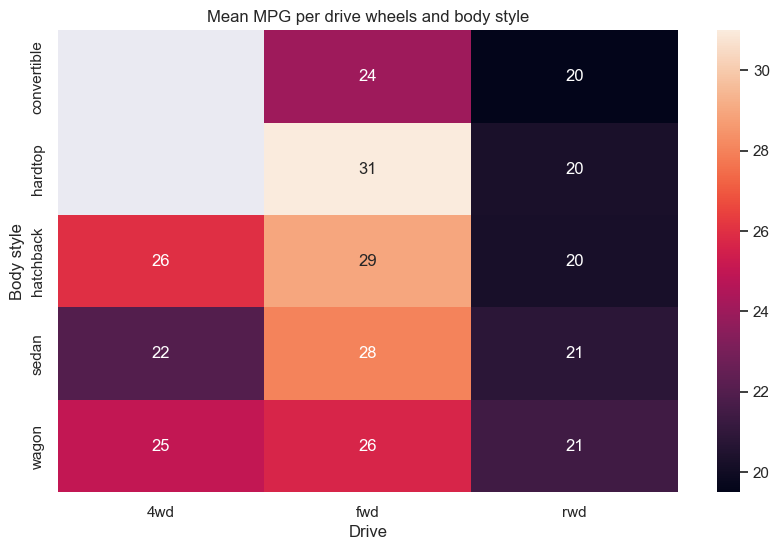

In [153]:
sns.heatmap(mpg_style_table, annot=True).set(title="Mean MPG per drive wheels and body style",
                                            xlabel="Drive",
                                            ylabel="Body style")

From the heat map, the most fuel efficient type of car is a hardtop with forward wheel drive. Hatchbacks are also quite fuel efficient. This is not surprising because as we saw earlier, most hatchbacks are lower priced and lower priced cars tended to have smaller engines. 4 wheel drive cars are medium efficiency. The least efficient cars are convertibles.

### Symboling
So far in the analysis, we have not looked at the symboling column. Symboling represents how risky a car is to insure. There are potentially some insights to be gained from analysing this. (-3 is the lowest risk and +3 is the highest risk).

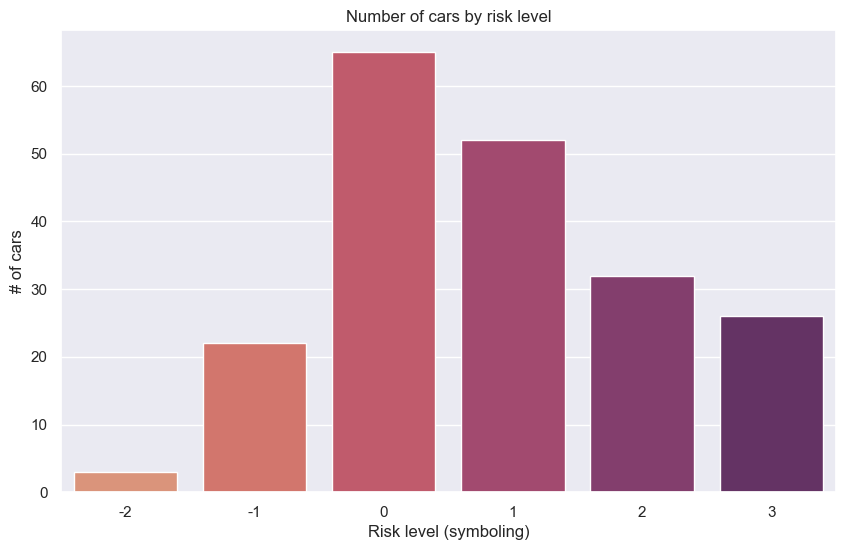

In [154]:
sns.countplot(data=auto_df, x="symboling",
              palette=sns.color_palette("flare")).set(title="Number of cars by risk level",
                                                    xlabel="Risk level (symboling)",
                                                    ylabel="# of cars")

The above chart shows the number of cars for each risk level in the dataset. The majority of cars are rated 0 or 1. However, there are no cars rated -3, and not many cars rated below zero. The data is skewed towards the right suggesting that the cars in this dataset carry more risk on average.

In [173]:
auto_df["symboling"].describe()

count    200.000000
mean       0.830000
std        1.248557
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

Because of the skewness of the data and the categorical nature of risk level, we will take the average to be the median: 1.<br>
What kind of cars have the most risk to insure?

In [155]:
style_risk = auto_df.groupby("body-style", as_index=False)["symboling"].agg("median")

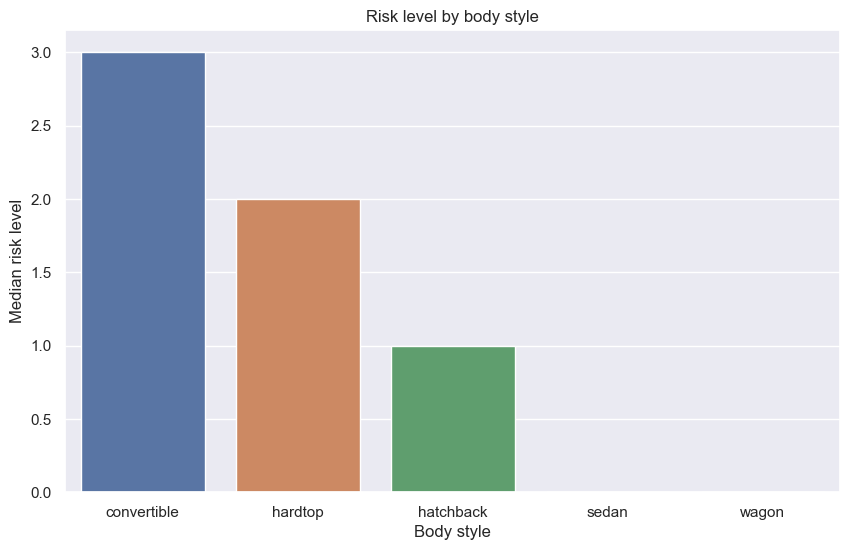

In [156]:
sns.barplot(data=style_risk,
           x="body-style",
           y="symboling").set(title="Risk level by body style",
                         xlabel="Body style",
                         ylabel="Median risk level")
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')

The most risky cars for insurers are convertibles and hardtops, the safest cars are sedans and wagons. However, previously it was shown that the dataset only contained information about 5 convertibles and 8 hardtops. These cars were also the most expensive in the dataset. Maybe price is influencing the results.

In [157]:
price_risk = auto_df.groupby("symboling", as_index=False)["price"].agg("mean")

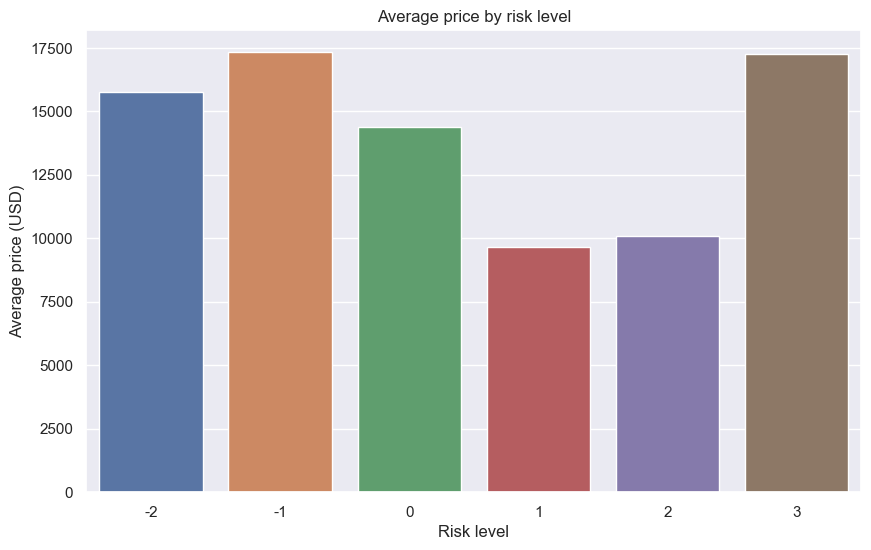

In [158]:
sns.barplot(data=price_risk,
           x="symboling",
           y="price").set(title="Average price by risk level",
                         xlabel="Risk level",
                         ylabel="Average price (USD)")


From the chart above, we can see that there is not really a pattern between price and risk level. The most expensive cars are risk levels 3 and -1. Further analysis is necessary to determine the relationship. A few very expensive cars could be affecting the averages, particularly because some groups have very few entries (only three cars in the '-2' level)

In [159]:
style_price_risk = pd.pivot_table(auto_df, values="symboling", index="body-style", columns="price_range",
                          aggfunc="median")
style_price_risk

price_range,low,lower medium,upper medium,high
body-style,,,,
convertible,NaN,NaN,3.0,3.0
hardtop,NaN,2.0,2.0,2.0
hatchback,1.0,1.0,3.0,3.0
sedan,1.0,1.0,0.0,0.0
wagon,0.0,0.0,0.0,-0.5


[Text(0.5, 1.0, 'Median risk level by price range and body style'),
 Text(0.5, 33.249999999999986, 'Price range'),
 Text(92.25, 0.5, 'Body style')]

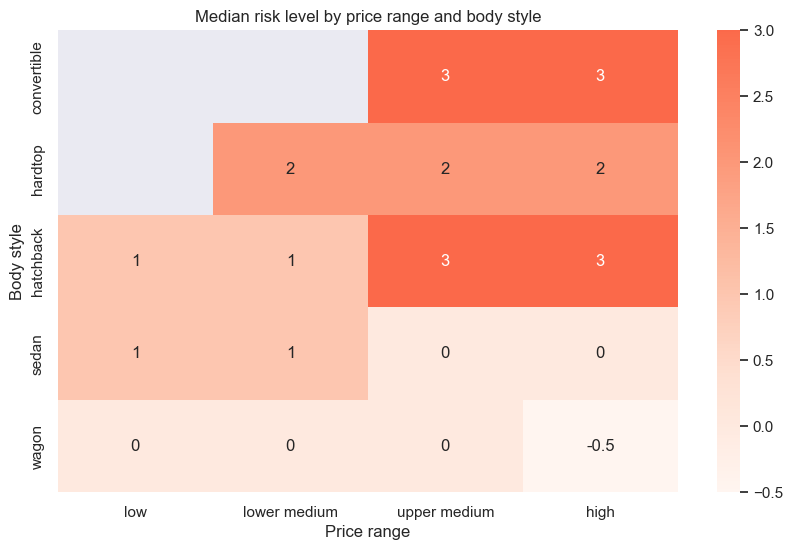

In [161]:
sns.heatmap(style_price_risk, annot=True,
            center=3, cmap="Reds").set(title="Median risk level by price range and body style",
                                            xlabel="Price range",
                                            ylabel="Body style")

The heat map shows that body style has more of an influence than price range for risk. Convertibles and hardtops have the most risk and wagons have the least risk. Hatchbacks are low risk in general, unless they are higher priced. Sedans are also low risk, but cheaper sedans have more risk than more expensive sedans. However, this analysis suffers from small samples for some groups. There are very few convertibles, hardtops and wagons in the dataset. More data is needed to make strong conclusions.